# 1) Importing the Libraries

In [0]:
from textblob import TextBlob
# TextBlob is a Python library to process the textual data 
# It provides a simple API for diving into common natural language processing tasks such as POS tagging, noun phrase extraction, sentiment analysis, classification, etc

In [0]:
import sys
# The sys module provides information about constants, functions and methods of the Python interpreter

In [0]:
import tweepy
# Tweepy is a Python library for accessing the Twitter API

In [0]:
import matplotlib.pyplot as plt

# 2)  Connecting with the Twitter API

In [0]:
# Importing the keys
consumer_key = "0X1n7RLbEbKCptc3IWWO0NyKg"
consumer_secret = "JAIvCNkR2KtPsKP2KuWI6Uf4vdSwWB04Fsn6WnzHxp2RF2d3G7"
access_token = "4265465548-H3Wrpd5r6H0XvrlPdXrCgVGgK7XtWFtRod68mdR"
access_token_secret = "nf16USo4dklbFoNE4W1rNmhS564rm7yFgJdIcKIsLMUXE"

In [0]:
# Establish the connection with API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
# given authorization to tweepy for accessing the twitter data

api = tweepy.API(auth) # geting API

In [7]:
# Define variables, search term and number of tweets
search_term = input("Enter Keyword/Tag to search about: ")
no_of_tweets = int(input("Enter how many tweets to search: "))

# search_term will allow us to search the term on twitter
# and second line will allow us to enter number the number of twits

Enter Keyword/Tag to search about: House of Cards
Enter how many tweets to search: 25


In [0]:
# Get no_of_tweets and search_term together
tweets = tweepy.Cursor(api.search, q=search_term).items(no_of_tweets)

# 3) Understanding the working of TextBlob

In [0]:
# TextBlob gives the sentiment polarity between -1 to +1
# -1 is for negative polarity, 0 is for neutral polarity and +1 is for positive polarity

In [9]:
# Negative polarity
a = TextBlob("I am a bad Cricket player")
a.sentiment.polarity

-0.6999999999999998

In [10]:
# Positive polarity
b = TextBlob("I am a good Cricket player")
b.sentiment.polarity

0.7

In [11]:
# Neutral polarity
c = TextBlob("I am a Cricket player")
c.sentiment.polarity

0.0

# 4) Iterate the data and convert the result in percentage

In [0]:
# Create variables to hold the average polarity

positive = 0
negative = 0
neutral = 0
polarity = 0

# 'polarity' will be the average polarity of all the twits 

In [0]:
# Iterate with for loop

for tweet in tweets:
   analysis = TextBlob(tweet.text) # 'tweet.text' number of tweets that we are searching for
   polarity += analysis.sentiment.polarity
   
   if(analysis.sentiment.polarity == 0):
       neutral += 1
       
   elif(analysis.sentiment.polarity < 0.00):
       negative += 1

   elif(analysis.sentiment.polarity > 0.00):
       positive += 1

In [0]:
# Define a function to calculate the percentage
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [15]:
percentage(5,20)
# function is working fine

25.0

In [0]:
# Generate the percentages
positive = percentage(positive, no_of_tweets)
negative = percentage(negative, no_of_tweets)
neutral  = percentage(neutral, no_of_tweets)
polarity  = percentage(polarity, no_of_tweets)

In [0]:
# Limit decimal upto 2 places
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

# 5) Getting the result of analysis

In [18]:
# Print analysis of result

print("Reaction of the people on " + search_term + 
      " By analyzing " + str(no_of_tweets) + " Tweets ")

if (polarity == 0):
    print(" is 'Neutral'")
    
elif (polarity < 0.00):
    print("is 'Negative'")
    
elif (polarity > 0.00):
    print("is 'Positive'")

Reaction of the people on House of Cards By analyzing 25 Tweets 
is 'Positive'


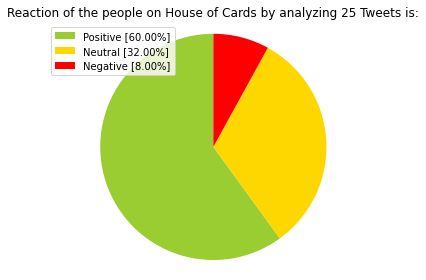

In [19]:
# Print Pie Chart
    
labels = ['Positive ['+str(positive)+'%]', 
          'Neutral ['+str(neutral)+'%]', 
          'Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']

patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('Reaction of the people on '
          + search_term +' by analyzing '
          + str(no_of_tweets) +' Tweets is:')
plt.axis('equal')
plt.tight_layout()
plt.show()